# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

# Functions

In [2]:
# Checking a column (dtype object) for unique values and their count 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

# Checking a column (dtype float) with a histogram and 
# its characteristics (number of values in the column, mean, standard deviation, minimum,
# 25th percentile, 50th percentile, 75th percentile, and maximum)
def float_check(column):
    column.hist()
    print(column.describe())


# When adding a new column (dummy variable) 
# we put 1 - if there is one, 0 - if there is no one
def find_item(cell):
    if item in cell:
        return 1
    return 0


# Checking for missing values in the column
def procent_check(column, df):
    math = 100 - ((df[column].count() * 100) / len(df))
    print("In the column",column, '\033[4m' + str(round(math, 2)),"percentages" + '\033[0m',"of the information is not available.")
    
# Output of basic statistics of categorical features
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Histogram construction and output of basic statistics of digital signs
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())
    

# Short dataset check
def df_check(df):
    display(df.head())
    display(df.info())
    
def replace_nan(df,column):
    return df[column].astype(str).apply(lambda x: 'Unknown' if x == 'nan' else x)

# ---------------------------- Data ----------------------------

# Information

### Customers:

* <i>CustomerKey</i> : Customer ID
* <i>FirstName</i> : Customer Name 
* <i> LastName</i> : Customer Last Name
* <i> Full Name</i> : Customer's First and Last Name
* <i> BirthDate</i> : Customer's Birthday
* <i> AgeOfCustomer</i> : Age of Customer at time of order
<br> &#10149; (data retrieved with 'BirthDate' and 'DateFirstPurchase')
* <i> Gender</i> : Customer's gender
* <i> DateFirstPurchase</i> : The date the product was ordered 
* <i> Customer City</i> : Customer City

### Sales:

* <i> ProductKey</i> : Product ID
* <i> OrderDateKey</i> : Order Date ID
* <i> DueDateKey</i> : ID Date of Delivery
* <i> ShipDateKey</i> : ID Date of shipment 
* <i> SalesOrderNumber</i> : Shipping number
* <i> SalesAmount</i> : Sales Volume

### Products:

* <i> ProductKey</i> : Customer ID
* <i> ProductItemCode</i> : Product Series 
* <i> Product Name</i> : Product name
* <i> Sub Category</i> : Product subcategory
* <i> Product Category</i> : Product Category
* <i> StandardCost</i> : Cost of item
* <i> Product Color</i> : Product Color
* <i> Product Size</i> : Size of item 
* <i> Product Line</i> : Product line
* <i> Model Name</i> : Model name
* <i> Product Description</i> : Product Description
* <i> Product Description DE</i> : Product Description in German  
* <i> Product Status</i> : Status of the product

# Preparing datasets

### Customers

In [3]:
customers = pd.read_csv('DIM_Customer.csv', sep = ';')

In [4]:
df_check(customers)

CustomerKey  FirstName LastName         Full Name   BirthDate  \
0        11000        Jon     Yang           JonYang  1971-10-06   
1        11001     Eugene    Huang       EugeneHuang  1976-05-10   
2        11002      Ruben   Torres       RubenTorres  1971-02-09   
3        11003    Christy      Zhu        ChristyZhu  1973-08-14   
4        11004  Elizabeth  Johnson  ElizabethJohnson  1979-08-05   

   AgeOfCustomer  Gender DateFirstPurchase Customer City  
0             47    Male        2018-01-19   Rockhampton  
1             42    Male        2018-01-15       Seaford  
2             47    Male        2018-01-07        Hobart  
3             44  Female        2017-12-29    North Ryde  
4             39  Female        2018-01-23    Wollongong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerKey        18484 non-null  int64 
 1   FirstName          18484 non-null  object
 2   LastName           18484 non-null  object
 3   Full Name          18484 non-null  object
 4   BirthDate          18484 non-null  object
 5   AgeOfCustomer      18484 non-null  int64 
 6   Gender             18484 non-null  object
 7   DateFirstPurchase  18484 non-null  object
 8   Customer City      18484 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.3+ MB


None

In [5]:
# Check dataset for empty values
customers.columns[customers.isnull().any()]

Index([], dtype='object')

In [6]:
# Get rid of unnecessary columns

# -- FirstName
# -- LastName

# Since we have created an age column in advance 
# column in SQL, let's remove the following columns:

# -- BirthDate
# -- DateFirstPurchase

customers = customers.drop(['FirstName', 'LastName', 'BirthDate', 'DateFirstPurchase'], axis = 1)

### Sales

In [7]:
# Sales

sales = pd.read_csv('DIM_OnlineSales.csv', sep = ';')

In [8]:
df_check(sales)

ProductKey  OrderDateKey  DueDateKey  ShipDateKey  CustomerKey  \
0         381      20190101    20190113     20190108        16942   
1         375      20190101    20190113     20190108        15114   
2         369      20190101    20190113     20190108        15116   
3         337      20190101    20190113     20190108        20576   
4         370      20190101    20190113     20190108        13059   

  SalesOrderNumber SalesAmount  
0          SO46700   1000,4375  
1          SO46701   2181,5625  
2          SO46702     2443,35  
3          SO46703      782,99  
4          SO46704     2443,35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        58168 non-null  int64 
 1   OrderDateKey      58168 non-null  int64 
 2   DueDateKey        58168 non-null  int64 
 3   ShipDateKey       58168 non-null  int64 
 4   CustomerKey       58168 non-null  int64 
 5   SalesOrderNumber  58168 non-null  object
 6   SalesAmount       58168 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


None

In [9]:
# Check the dataset for empty values
sales.columns[sales.isnull().any()]

Index([], dtype='object')

In [10]:
# Get rid of unnecessary columns:
# -- OrderDateKey
# -- DueDateKey
# -- ShipDateKey
# -- SalesOrderNumber

sales = sales.drop(['OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesOrderNumber'], axis = 1)

In [11]:
# Let's convert the SalesAmount column to float
# 1 method

sales['SalesAmount'] = pd.to_numeric(sales['SalesAmount'].str.replace(",", "."))

In [12]:
# Let's convert the SalesAmount column to float
# Method 2

# sales.SalesAmount = sales.SalesAmount.astype(str).apply(lambda x: float(str(x).replace(",", "."))) 

### Товары

In [13]:
products = pd.read_csv('DIM_Product.csv', sep = ';')

In [14]:
df_check(products)

ProductKey ProductItemCode           Product Name Sub Category  \
0           1         AR-5381        Adjustable Race          NaN   
1           2         BA-8327           Bearing Ball          NaN   
2           3         BE-2349        BB Ball Bearing          NaN   
3           4         BE-2908  Headset Ball Bearings          NaN   
4           5         BL-2036                  Blade          NaN   

  Product Category StandardCost Product Color Product Size Product Line  \
0              NaN          NaN           NaN          NaN          NaN   
1              NaN          NaN           NaN          NaN          NaN   
2              NaN          NaN           NaN          NaN          NaN   
3              NaN          NaN           NaN          NaN          NaN   
4              NaN          NaN           NaN          NaN          NaN   

  Model Name Product Description Product Description DE Product Status  
0        NaN                 NaN                    NaN        Current  
1        NaN                 NaN                    NaN        Current  
2        NaN                 NaN                    NaN        Current  
3        NaN                 NaN                    NaN        Current  
4        NaN                 NaN                    NaN        Current

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductKey              606 non-null    int64 
 1   ProductItemCode         606 non-null    object
 2   Product Name            606 non-null    object
 3   Sub Category            397 non-null    object
 4   Product Category        397 non-null    object
 5   StandardCost            395 non-null    object
 6   Product Color           352 non-null    object
 7   Product Size            299 non-null    object
 8   Product Line            380 non-null    object
 9   Model Name              397 non-null    object
 10  Product Description     396 non-null    object
 11  Product Description DE  396 non-null    object
 12  Product Status          606 non-null    object
dtypes: int64(1), object(12)
memory usage: 61.7+ KB


None

In [15]:
# Check columns that have empty values

products.columns[products.isnull().any()]

Index(['Sub Category', 'Product Category', 'StandardCost', 'Product Color',
       'Product Size', 'Product Line', 'Model Name', 'Product Description',
       'Product Description DE'],
      dtype='object')

In [16]:
# Check the percentage of empty values

procent_check('Sub Category', products)
procent_check('Product Category', products)
procent_check('StandardCost', products)
procent_check('Product Color', products)
procent_check('Product Size', products)
procent_check('Product Line', products)
procent_check('Model Name', products)
procent_check('Product Description', products)
procent_check('Product Description DE', products)

In the column Sub Category 34.49 percentages of the information is not available.
In the column Product Category 34.49 percentages of the information is not available.
In the column StandardCost 34.82 percentages of the information is not available.
In the column Product Color 41.91 percentages of the information is not available.
In the column Product Size 50.66 percentages of the information is not available.
In the column Product Line 37.29 percentages of the information is not available.
In the column Model Name 34.49 percentages of the information is not available.
In the column Product Description 34.65 percentages of the information is not available.
In the column Product Description DE 34.65 percentages of the information is not available.


In [17]:
# The StandardCost column stores data about the cost of the item
# It is necessary to change the type of this data and find a solution to replace 
# empty values

products["StandardCost"] = pd.to_numeric(products["StandardCost"].str.replace(',','.'))

In [18]:
products["StandardCost"].fillna(value = 0, inplace = True)

In [19]:
# When we have changed the NaN value to 0,
# we can test the hypothesis that there is an identical item in the list

search_for_null = products.ProductItemCode[products["StandardCost"] == 0]
search_for_value = products.ProductItemCode[products["StandardCost"] > 0]

In [20]:
test_for_value = {}

for item in search_for_null:
    test_for_value[item] = 0

for item in test_for_value:
    for cell in search_for_value:
        if cell == item:
            test_for_value[item] +=1
        else:
            0

In [21]:
# Make sure the item was unique and does not occur more than once in the dataset
display(sum(map((0).__eq__, test_for_value.values())))
test_for_value.items()

211

dict_items([('AR-5381', 0), ('BA-8327', 0), ('BE-2349', 0), ('BE-2908', 0), ('BL-2036', 0), ('CA-5965', 0), ('CA-6738', 0), ('CA-7457', 0), ('CB-2903', 0), ('CN-6137', 0), ('CR-7833', 0), ('CR-9981', 0), ('CS-2812', 0), ('DC-8732', 0), ('DC-9824', 0), ('DT-2377', 0), ('EC-M092', 0), ('EC-R098', 0), ('EC-T209', 0), ('FE-3760', 0), ('FH-2981', 0), ('FW-1000', 0), ('FW-1200', 0), ('FW-1400', 0), ('FW-3400', 0), ('FW-3800', 0), ('FW-5160', 0), ('FW-5800', 0), ('FW-7160', 0), ('FW-9160', 0), ('FC-3654', 0), ('FC-3982', 0), ('FL-2301', 0), ('GP-0982', 0), ('GT-0820', 0), ('GT-1209', 0), ('GT-2908', 0), ('HJ-1213', 0), ('HJ-1220', 0), ('HJ-1420', 0), ('HJ-1428', 0), ('HJ-3410', 0), ('HJ-3416', 0), ('HJ-3816', 0), ('HJ-3824', 0), ('HJ-5161', 0), ('HJ-5162', 0), ('HJ-5811', 0), ('HJ-5818', 0), ('HJ-7161', 0), ('HJ-7162', 0), ('HJ-9080', 0), ('HJ-9161', 0), ('HN-1024', 0), ('HN-1032', 0), ('HN-1213', 0), ('HN-1220', 0), ('HN-1224', 0), ('HN-1420', 0), ('HN-1428', 0), ('HN-3410', 0), ('HN-3416', 

In [22]:
# The second way to make sure:

search_for_null_new = products[products["StandardCost"] == 0]
search_for_null_new.groupby(products["StandardCost"] == 0, sort = True)['ProductItemCode'].value_counts()

StandardCost  ProductItemCode
True          AR-5381            1
              BA-8327            1
              BE-2349            1
              BE-2908            1
              BL-2036            1
                                ..
              SR-2098            1
              SS-2985            1
              ST-9828            1
              TO-2301            1
              TP-0923            1
Name: ProductItemCode, Length: 211, dtype: int64

In [23]:
# Make sure the product name is unique

search_for_name = products['Product Name'][products["StandardCost"] == 0]

col = {}

for item in search_for_name:
    col[item] = 0

for item in col:
    for cell in search_for_name:
        if cell == item:
            col[item] +=1
        else:
            0

In [24]:
display(sum(map((1).__eq__, col.values())))
len(col)

211

211

In [25]:
# Because the data could not be recovered 
# due to a lack of additional information,
# we get rid of the unnecessary data,
# But first we get rid of the columns we don't need

# Get rid of the columns we don't need:
# -- ProductItemCode
# -- Product Color
# -- Product Size
# -- Product Line
# -- Model Name
# -- Product Status

products = products.drop(['ProductItemCode','Product Color','Product Size'
                         ,'Product Line','Model Name','Product Status'], axis = 1)

In [26]:
products.columns

Index(['ProductKey', 'Product Name', 'Sub Category', 'Product Category',
       'StandardCost', 'Product Description', 'Product Description DE'],
      dtype='object')

In [27]:
products = products.dropna(axis=0)

In [28]:
df_check(products)

ProductKey               Product Name Sub Category Product Category  \
209         210  HL Road Frame - Black, 58  Road Frames       Components   
210         211    HL Road Frame - Red, 58  Road Frames       Components   
211         212      Sport-100 Helmet, Red      Helmets      Accessories   
212         213      Sport-100 Helmet, Red      Helmets      Accessories   
213         214      Sport-100 Helmet, Red      Helmets      Accessories   

     StandardCost                                Product Description  \
209        0.0000  Our lightest and best quality aluminum frame m...   
210        0.0000  Our lightest and best quality aluminum frame m...   
211       12.0278  Universal fit, well-vented, lightweight , snap...   
212       13.8782  Universal fit, well-vented, lightweight , snap...   
213       13.0863  Universal fit, well-vented, lightweight , snap...   

                                Product Description DE  
209  Unser leichtester und hochwertigster Aluminium...  
210  Unser leichtester und hochwertigster Aluminium...  
211  "Einheitsgröße, atmungsaktiv, leicht, aufsetzb...  
212  "Einheitsgröße, atmungsaktiv, leicht, aufsetzb...  
213  "Einheitsgröße, atmungsaktiv, leicht, aufsetzb...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 209 to 605
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductKey              396 non-null    int64  
 1   Product Name            396 non-null    object 
 2   Sub Category            396 non-null    object 
 3   Product Category        396 non-null    object 
 4   StandardCost            396 non-null    float64
 5   Product Description     396 non-null    object 
 6   Product Description DE  396 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ KB


None

In [29]:
# Check for null values

count = 0

for item in products.StandardCost:
    if item == 0:
        count += 1
        
print(count)

2


In [30]:
# By getting rid of the rows with null values we get
# two rows that do not have a value in the StandardCost column
# Through a similar category and subcategories we find the average value and add it

mean_components = round(float(products.groupby((products['Sub Category'] == 'Road Frames') 
                 & (products['Product Category'] == 'Components')
                )['StandardCost'].mean().drop(False)), 6)
mean_components

409.164677

In [31]:
products.StandardCost = products.StandardCost.apply(lambda x: mean_components if x == 0 else x)

In [32]:
products.columns[products.isnull().any()]

Index([], dtype='object')

## Putting together a single dataset

In [33]:
data = pd.merge(customers, sales, on = ['CustomerKey'])

In [34]:
df = pd.merge(data, products, on = ['ProductKey'])

In [35]:
df_check(df)

CustomerKey    Full Name  AgeOfCustomer  Gender Customer City  ProductKey  \
0        11000      JonYang             47    Male   Rockhampton         353   
1        11001  EugeneHuang             42    Male       Seaford         353   
2        11015   ChloeYoung             36  Female       Burbank         353   
3        11018  ClarenceRai             63    Male       Bendigo         353   
4        11022   EthanZhang             36    Male    Bellingham         353   

   SalesAmount             Product Name    Sub Category Product Category  \
0      2319.99  Mountain-200 Silver, 38  Mountain Bikes            Bikes   
1      2319.99  Mountain-200 Silver, 38  Mountain Bikes            Bikes   
2      2319.99  Mountain-200 Silver, 38  Mountain Bikes            Bikes   
3      2319.99  Mountain-200 Silver, 38  Mountain Bikes            Bikes   
4      2319.99  Mountain-200 Silver, 38  Mountain Bikes            Bikes   

   StandardCost                                Product Description  \
0     1265.6195  Serious back-country riding. Perfect for all l...   
1     1265.6195  Serious back-country riding. Perfect for all l...   
2     1265.6195  Serious back-country riding. Perfect for all l...   
3     1265.6195  Serious back-country riding. Perfect for all l...   
4     1265.6195  Serious back-country riding. Perfect for all l...   

                              Product Description DE  
0  Mountainbike für Profis. Perfekt für alle Schw...  
1  Mountainbike für Profis. Perfekt für alle Schw...  
2  Mountainbike für Profis. Perfekt für alle Schw...  
3  Mountainbike für Profis. Perfekt für alle Schw...  
4  Mountainbike für Profis. Perfekt für alle Schw...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58168 entries, 0 to 58167
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerKey             58168 non-null  int64  
 1   Full Name               58168 non-null  object 
 2   AgeOfCustomer           58168 non-null  int64  
 3   Gender                  58168 non-null  object 
 4   Customer City           58168 non-null  object 
 5   ProductKey              58168 non-null  int64  
 6   SalesAmount             58168 non-null  float64
 7   Product Name            58168 non-null  object 
 8   Sub Category            58168 non-null  object 
 9   Product Category        58168 non-null  object 
 10  StandardCost            58168 non-null  float64
 11  Product Description     58168 non-null  object 
 12  Product Description DE  58168 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.2+ MB


None

# Preprocessing

In [36]:
# For easy viewing we remove 
# cell view restrictions
pd.set_option('display.max_colwidth', None)

In [37]:
# Rename the column indexes
df.columns = ['customer_key','full_name','customer_age',
              'gender','customer_city','product_key',
              'sales_amount','product_name','sub_category',
              'product_category','standard_cost','product_description',
              'product_description_de']

# Processing

### customer_age

In [38]:
# Let's check the age of the clients, so we will know the age of the target audience
# Let's additionally build a histogram, for clarity

object_check(df.customer_age)

customer_age
45           2248
44           2233
39           2207
41           2149
40           2110
..            ...
93              6
91              5
95              5
104             3
100             2

[72 rows x 1 columns]

[ 47  42  36  63  67  66  65  37  61  60  59  55  43  46  48  39  41  50
  54  56  81  75  52  51  57  62  69  38  40  58  49  35  32  44  45  53
  34  72  64  71  70  68  80  77  73  33  79  74  83  76  82  84  92  78
  85  91 103  96  93  87  89 102  86  88  90 104  94 101  95  98  97 100]


There are 8 clients over 100 years old. Which is 0.04 % of the number of clients.
There are 221 clients from 80 to 100 years old. Which is 1.22 % of the number of clients.
There are 3892 clients from 60 to 80 years old. Which is 21.45 % of the number of clients.
There are 4496 clients from 50 to 60 years old. Which is 24.78 % of the number of clients.
There are 6279 clients from 40 to 50 years old. Which is 34.61 % of the number of clients.
There are 3245 clients from 30 to 40 years old. Which is 17.89 % of the number of clients.
There are 0 clients between 20 and 30 years old. Which is 0.0 % of the number of clients.


array([[<AxesSubplot:title={'center':'customer_age'}>]], dtype=object)

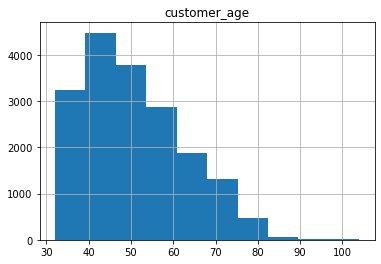

In [39]:
customer_age = df.groupby('full_name')[['customer_age']].max().sort_values('customer_age', ascending=False)
print("There are",len(customer_age[(customer_age.customer_age > 100)]),"clients over 100 years old. Which is",
     round((len(customer_age[(customer_age.customer_age > 100)]) * 100) / len(customer_age), 2), "% of the number of clients.")

print("There are",len(customer_age[(customer_age.customer_age <= 100) &(customer_age.customer_age >= 80)] ),"clients from 80 to 100 years old. Which is",
     round((len(customer_age[(customer_age.customer_age <= 100) &(customer_age.customer_age >= 80)] )* 100) / len(customer_age), 2), "% of the number of clients.")

print("There are",len(customer_age[(customer_age.customer_age >= 60) &(customer_age.customer_age <= 79)] ),"clients from 60 to 80 years old. Which is",
     round((len(customer_age[(customer_age.customer_age >= 60) &(customer_age.customer_age <= 79)] ) * 100) / len(customer_age), 2), "% of the number of clients.")

print("There are",len(customer_age[(customer_age.customer_age >= 50) &(customer_age.customer_age <= 59)] ),"clients from 50 to 60 years old. Which is",
     round((len(customer_age[(customer_age.customer_age >= 50) &(customer_age.customer_age <= 59)] ) * 100) / len(customer_age), 2), "% of the number of clients.")

print("There are",len(customer_age[(customer_age.customer_age >= 40) &(customer_age.customer_age <= 49)] ),"clients from 40 to 50 years old. Which is",
     round((len(customer_age[(customer_age.customer_age >= 40) &(customer_age.customer_age <= 49)] ) * 100) / len(customer_age), 2), "% of the number of clients.")

print("There are",len(customer_age[(customer_age.customer_age >= 30) &(customer_age.customer_age <= 39)] ),"clients from 30 to 40 years old. Which is",
     round((len(customer_age[(customer_age.customer_age >= 30) &(customer_age.customer_age <= 39)] ) * 100) / len(customer_age), 2), "% of the number of clients.")

print("There are",len(customer_age[(customer_age.customer_age >= 20) &(customer_age.customer_age <= 29)] ),"clients between 20 and 30 years old. Which is",
     round((len(customer_age[(customer_age.customer_age >= 20) &(customer_age.customer_age <= 29)] ) * 100) / len(customer_age), 2), "% of the number of clients.")

customer_age.hist()

### gender

gender
Male     29267
Female   28901

['Male' 'Female']


<AxesSubplot:>

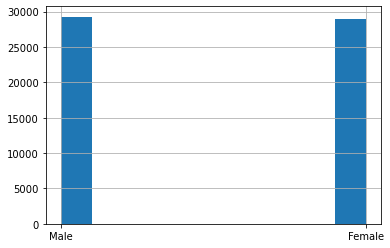

In [40]:
# We know the gender of our customers:
# Men and women are interested in our product

object_check(df.gender)
df.gender.hist()

### customer_city

In [41]:
# As we can see many cities are ordering our product
# Let's find out the top 15 cities

object_check(df.customer_city)

customer_city
London                1544
Paris                 1148
Cliffside              901
Berlin                 572
Chula Vista            567
...                    ...
Bountiful                2
Chehalis                 1
Braintree                1
Byron                    1
Bellevue                 1

[268 rows x 1 columns]

['Rockhampton' 'Seaford' 'Burbank' 'Bendigo' 'Bellingham' 'Goulburn'
 'St. Leonards' 'Cranbourne' 'Tacoma' 'Lavender Bay' 'East Brisbane'
 'Newcastle' 'Warrnambool' 'Wollongong' 'Lincoln Acres' 'San Gabriel'
 'Concord' 'Beverly Hills' 'Colma' 'Solingen' 'Versailles' 'Hamburg'
 'Lemon Grove' 'Burien' 'Newton' 'Berlin' 'Stoke-on-Trent' 'Watford'
 'Tremblay-en-France' 'Metz' 'Gateshead' 'Milton Keynes' 'Saint Ouen'
 'Paris' 'Pantin' 'Cloverdale' 'Gold Coast' 'York' 'Hawthorne'
 'Warrington' 'Esher-Molesey' 'Eilenburg' 'N. Vancouver' 'Portland'
 'Roubaix' 'Frankfurt am Main' 'Cheltenham' 'Saint-Denis' 'Saarbrücken'
 'Les Ulis' 'Morangis' 'Offenbach' 'Lancaster' 'Cliffside' 'Seattle'
 'Bellflower' 'El Cajon' 'Shawnee' 'Spring Valley' 'Malabar' 'Perth'
 'Burlingame' 'Bremerton' 'W. Linn' 'San Carlos' 'Santa Monica' 'Rhodes'
 'Hobart' 'Townsville' 'Port Macquarie' 'Brisbane' 'Geelong' 'Victoria'
 'Sunbury' 'Lane Cove' 'Hervey Bay' 'Renton' 'Caloundra' 'Sooke'
 'Milwaukie' 'Dunkerque' 'Santa C

In [42]:
df.customer_city.value_counts().head(15)

London          1544
Paris           1148
Cliffside        901
Berlin           572
Chula Vista      567
Burien           563
Shawnee          549
Bellingham       549
Berkeley         546
N. Vancouver     546
Concord          540
Beaverton        535
Burlingame       516
Bellflower       511
Langley          511
Name: customer_city, dtype: int64

### sales_amount

count    58168.000000
mean       382.336169
std        755.592295
min          2.290000
25%          7.950000
50%         28.990000
75%         69.990000
max       2443.350000
Name: sales_amount, dtype: float64


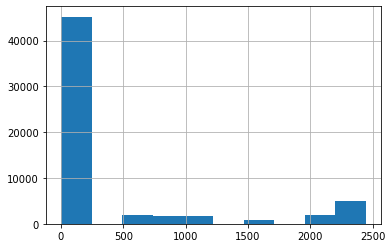

In [43]:
float_check(df.sales_amount)

In [44]:
# Let's check the sales volume
# Let's check the product categories first
# Bicycles are the most purchased category

sales_amount = df.groupby('product_category')[['sub_category','sales_amount']].max().sort_values('sales_amount', ascending = False)
sales_amount

sub_category  sales_amount
product_category                               
Bikes               Touring Bikes       2443.35
Accessories       Tires and Tubes        159.00
Clothing                    Vests         69.99

In [45]:
# Let's check now the best selling item by category

product_per_category = df.groupby('product_name')[['product_name','sub_category','sales_amount','customer_city']
                                                 ].max().sort_values('sales_amount', ascending = False)

In [46]:
def cost(column):
    sub_category = product_per_category[(product_per_category.sub_category == column)]['product_name'].max()
    city = product_per_category[(product_per_category.sub_category == column)]['customer_city'].max()
    return "The best-selling product in the subcategory " + column + ' : ' + sub_category + ' in the city ' + city

(*map(cost, df.sub_category.unique()),)

('The best-selling product in the subcategory Mountain Bikes : Mountain-500 Silver, 52 in the city York',
 'The best-selling product in the subcategory Fenders : Fender Set - Mountain in the city York',
 'The best-selling product in the subcategory Touring Bikes : Touring-3000 Yellow, 62 in the city York',
 'The best-selling product in the subcategory Tires and Tubes : Touring Tire Tube in the city York',
 'The best-selling product in the subcategory Helmets : Sport-100 Helmet, Red in the city York',
 'The best-selling product in the subcategory Jerseys : Short-Sleeve Classic Jersey, XL in the city York',
 'The best-selling product in the subcategory Bottles and Cages : Water Bottle - 30 oz. in the city York',
 'The best-selling product in the subcategory Caps : AWC Logo Cap in the city York',
 'The best-selling product in the subcategory Road Bikes : Road-750 Black, 58 in the city York',
 'The best-selling product in the subcategory Gloves : Half-Finger Gloves, S in the city York',
 '

### product_name

Water Bottle - 30 oz.      4244
Patch Kit/8 Patches        3191
Mountain Tire Tube         3095
Road Tire Tube             2376
Sport-100 Helmet, Red      2230
AWC Logo Cap               2190
Sport-100 Helmet, Blue     2125
Fender Set - Mountain      2121
Sport-100 Helmet, Black    2085
Mountain Bottle Cage       2025
Road Bottle Cage           1712
Touring Tire Tube          1488
HL Mountain Tire           1396
ML Mountain Tire           1161
LL Road Tire               1044
Name: product_name, dtype: int64


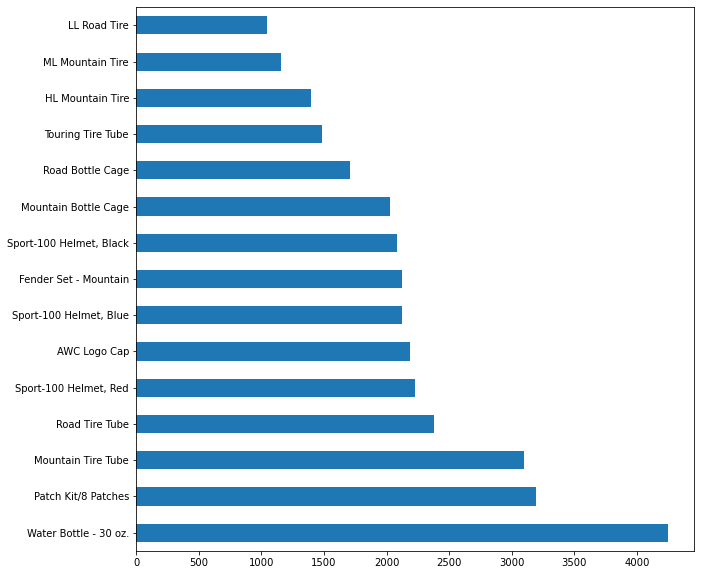

In [47]:
# Let's repeat the action above and find out the best sellers:
# Water Bottle - 30 oz.

print(df['product_name'].value_counts().head(15))
plt.rcParams['figure.figsize'] = (10,10)
product_name = df['product_name'].value_counts().nlargest(15).plot(kind='barh')

### standard_cost

count    58168.000000
mean       223.847465
std        447.200568
min          0.856500
25%          2.973300
50%         10.842300
75%         41.572300
max       1554.947900
Name: standard_cost, dtype: float64


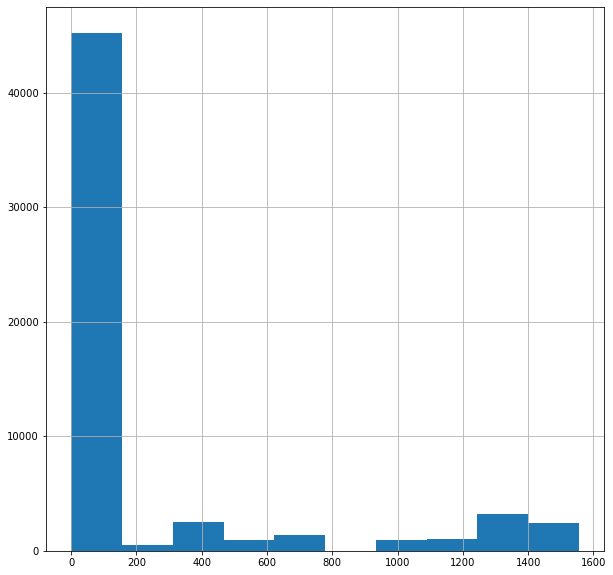

In [48]:
float_check(df.standard_cost)

In [49]:
# Let's group the data to see the most expensive items by subgroups

standard_cost = df.groupby('product_name')[['product_name','sub_category','standard_cost']].max().sort_values('standard_cost', ascending = False)

In [50]:
def cost(column):
    sub_category = standard_cost[(standard_cost.sub_category == column)]['product_name'].max()
    return "Самый дорогостоящий товар в категории " + column + ' : ' + sub_category

(*map(cost, df.sub_category.unique()),)

('Самый дорогостоящий товар в категории Mountain Bikes : Mountain-500 Silver, 52',
 'Самый дорогостоящий товар в категории Fenders : Fender Set - Mountain',
 'Самый дорогостоящий товар в категории Touring Bikes : Touring-3000 Yellow, 62',
 'Самый дорогостоящий товар в категории Tires and Tubes : Touring Tire Tube',
 'Самый дорогостоящий товар в категории Helmets : Sport-100 Helmet, Red',
 'Самый дорогостоящий товар в категории Jerseys : Short-Sleeve Classic Jersey, XL',
 'Самый дорогостоящий товар в категории Bottles and Cages : Water Bottle - 30 oz.',
 'Самый дорогостоящий товар в категории Caps : AWC Logo Cap',
 'Самый дорогостоящий товар в категории Road Bikes : Road-750 Black, 58',
 'Самый дорогостоящий товар в категории Gloves : Half-Finger Gloves, S',
 'Самый дорогостоящий товар в категории Bike Stands : All-Purpose Bike Stand',
 'Самый дорогостоящий товар в категории Socks : Racing Socks, M',
 'Самый дорогостоящий товар в категории Bike Racks : Hitch Rack - 4-Bike',
 "Самый доро